In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [2]:
f = lambda x : x**2 - 15*x +1
df = lambda x : 2*x - 15
ddf = lambda x : 2*x**0

X = np.linspace(-50,65)

In [13]:
def plot_curve(X, y):
    plt.figure(figsize=(8, 6))
    plt.plot(X, y)
    plt.grid()
    plt.show()

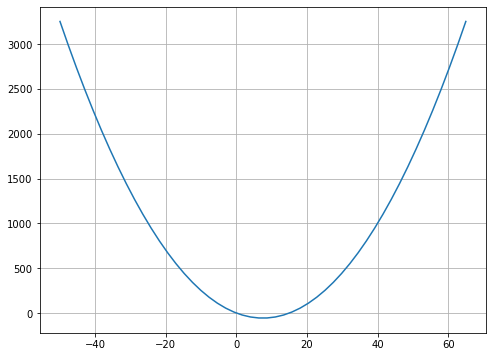

In [16]:
plot_curve(X, f(X))

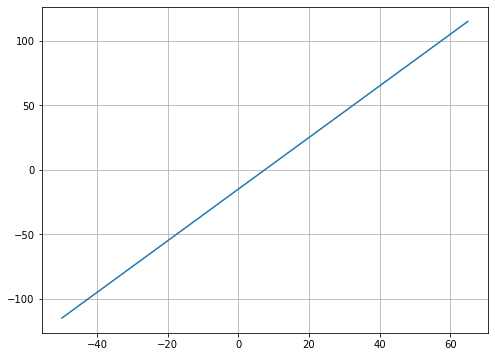

In [17]:
plot_curve(X, df(X))

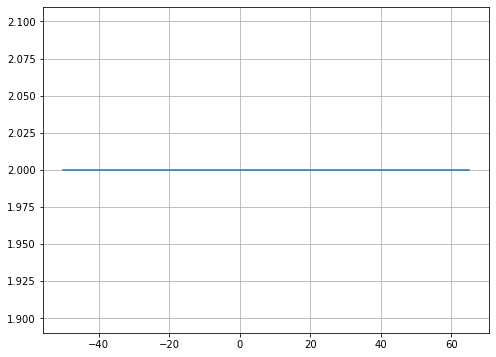

In [28]:
plot_curve(X, ddf(X))

#### observations:
- min of f(x) = root of 1st derivative
- sign of the min in 2nd derivative is positive so the function is convex

In [6]:
def GD_singleVariable(x, learning_rate=1, epsilon=0.1):
    i = 0
    while df(x) > epsilon:
        
        x = x - learning_rate*df(x)
        i = i + 1
    print(f'****************** Training Report ********************\n')
    print(f'Gradient Descent converged after {i-1} iterations')
    print(f'x_min = {x}')
    print(f'Gradient = {df(x)}\n')
    
    return x, df(x)

In [3]:
def Newton_singleVariable(x, learning_rate=1, epsilon=0.1):
    i = 0
    while df(x) > epsilon:

        x = x - learning_rate*df(x)/ddf(x)
        i = i + 1
    print(f'****************** Training Report ********************\n')
    print(f'Gradient Descent converged after {i-1} iterations')
    print(f'x_min = {x}')
    print(f'Gradient = {df(x)}\n')
    
    return x, df(x)

In [7]:
x1, df1 = GD_singleVariable(x=40, learning_rate=0.01, epsilon=0.1)

****************** Training Report ********************

Gradient Descent converged after 320 iterations
x_min = 7.549596800192111
Gradient = 0.09919360038422198



In [4]:
x1, df1 = Newton_singleVariable(x=40, learning_rate=1, epsilon=0.1)

****************** Training Report ********************

Gradient Descent converged after 0 iterations
x_min = 7.5
Gradient = 0.0



In [5]:
x1, df1 = Newton_singleVariable(x=40, learning_rate=0.8, epsilon=0.1)

****************** Training Report ********************

Gradient Descent converged after 4 iterations
x_min = 7.5104
Gradient = 0.020799999999999486



### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [8]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

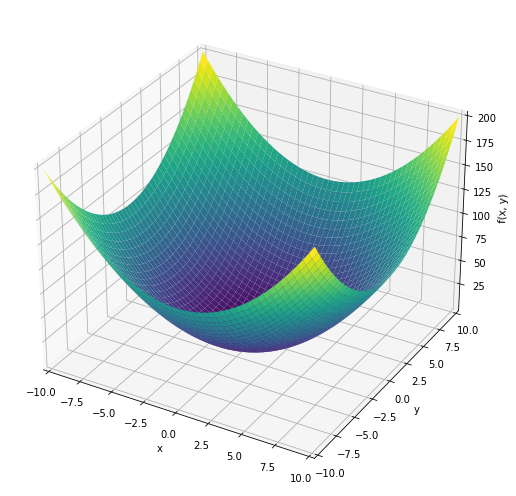

In [9]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

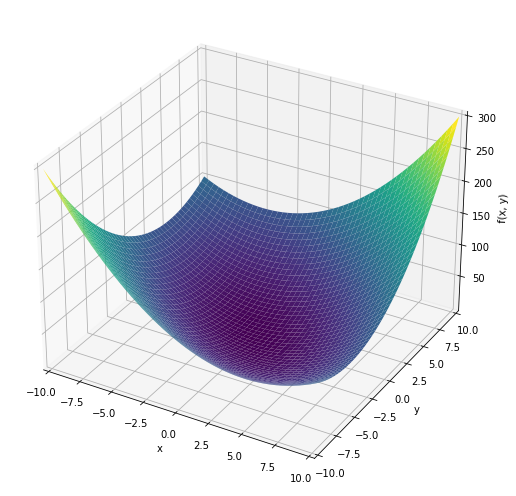

In [10]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

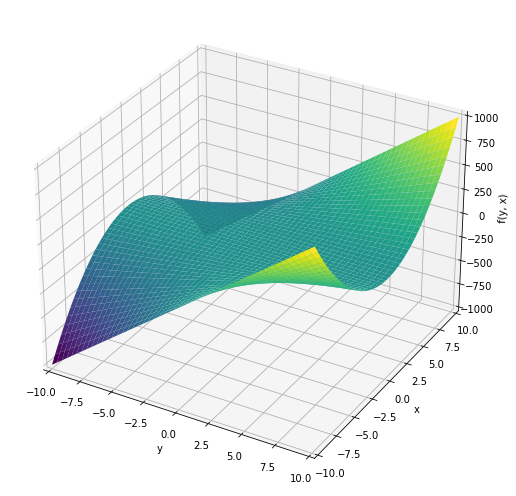

In [11]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+y^2$

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

$𝒇(𝒙)=𝒙^𝟐y$ 

In [6]:
f1 = lambda x,y : x**2 + y**2
df1 = lambda x : np.array(x*[[2.0],[2.0]])
ddf1 = lambda x : np.array([[2.0, 0.0], 
                            [0.0, 2.0]])

f2 = lambda x,y : x**2 + x*y + y**2
df2 = lambda x : np.array([[2.0*x[0, 0]+x[1,0]], 
                           [x[0,0]+2.0*x[1,0]]])
ddf2 = lambda x : np.array([[2.0, 1.0], 
                            [1.0, 2.0]])

f3 = lambda x,y : x**2 * y
df3 = lambda x : np.array([[2.0*x[0,0]*x[1,0]], 
                           [x[0,0]**2]])
ddf3 = lambda x : np.array([[2.0*x[1,0], 2.0*x[0,0]], 
                            [2.0*x[0,0], 0]])

In [8]:
def GD_MultiVariable(x0, df, learning_rate=1, epsilon=0.001):
    i = 0
    x0 = np.array(x0).reshape((-1, 1))
    
    while True:
        grad = df(x0)
        norm_grad = np.linalg.norm(grad)
        
        if norm_grad < epsilon:
            break
        x0 = x0 - grad*learning_rate
        i = i + 1
    print(f'****************** Training Report ********************\n')
    print(f'Gradient Descent converged after {i-1} iterations')
    print(f'x_min =\n {x0}')
    print(f'Gradient =\n {grad}\n')
    
    return x0, norm_grad

In [9]:
def Newton_MultiVariable(x0, df, ddf, learning_rate=1, epsilon=0.001):
    i = 0
    x0 = np.array(x0).reshape((-1, 1))  #column 
    
    while True:
        grad = df(x0)
        h = ddf(x0)
        
        norm_grad = np.linalg.norm(grad)
        
        if norm_grad < epsilon:
            break
        x0 = x0 - learning_rate*np.linalg.inv(h)@grad
        i = i + 1
    print(f'****************** Training Report ********************\n')
    print(f'Newton method converged after {i-1} iterations')
    print(f'x_min =\n {x0}')
    print(f'Gradient =\n {grad}\n')
    
    return x0, norm_grad

In [102]:
x, norm_grad = GD_MultiVariable(x0=(10,10), df=df1, learning_rate=0.1, epsilon=0.001)

****************** Training Report ********************

Gradient Descent converged after 45 iterations
x_min =
 [[0.00034845]
 [0.00034845]]
Gradient =
 [[0.0006969]
 [0.0006969]]



In [90]:
x, grad1 = GD_MultiVariable(x0=(10,10), learning_rate=0.5, epsilon=0.001, gradient=gradient1)

****************** Training Report ********************

Gradient Descent converged after 0 iterations
x_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]



In [40]:
x, grad1 = Newton_MultiVariable(x0=(10,10), df=df1, ddf=ddf1, learning_rate=1, epsilon=0.001)

****************** Training Report ********************

Newton method converged after 0 iterations
x_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]



In [41]:
x, grad1 = Newton_MultiVariable(x0=(10,10), df=df1, ddf=ddf1, learning_rate=0.5, epsilon=0.001)

****************** Training Report ********************

Newton method converged after 14 iterations
x_min =
 [[0.00030518]
 [0.00030518]]
Gradient =
 [[0.00061035]
 [0.00061035]]



In [93]:
x, grad1 = GD_MultiVariable(x0=(10,10), df=df2, learning_rate=0.5, epsilon=0.001)

****************** Training Report ********************

Gradient Descent converged after 15 iterations
x_min =
 [[0.00015259]
 [0.00015259]]
Gradient =
 [[0.00045776]
 [0.00045776]]



In [94]:
x, grad1 = Newton_MultiVariable(x0=(10,10), df=df2, ddf=ddf2, learning_rate=1, epsilon=0.001)

****************** Training Report ********************

Newton method converged after 0 iterations
x_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]



In [95]:
x, grad1 = Newton_MultiVariable(x0=(10,10), df=df2, ddf=ddf2, learning_rate=0.9, epsilon=0.001)

****************** Training Report ********************

Newton method converged after 4 iterations
x_min =
 [[0.0001]
 [0.0001]]
Gradient =
 [[0.0003]
 [0.0003]]



In [10]:
x, grad1 = GD_MultiVariable(x0=(10,10), df=df3, learning_rate=0.01, epsilon=0.001)

****************** Training Report ********************

Gradient Descent converged after 78 iterations
x_min =
 [[6.80598421e-05]
 [6.85061189e+00]]
Gradient =
 [[9.32503127e-04]
 [4.63214210e-09]]



In [11]:
x, grad1 = Newton_MultiVariable(x0=(10,10), df=df3, ddf=ddf3, learning_rate=1, epsilon=0.001)

****************** Training Report ********************

Newton method converged after 8 iterations
x_min =
 [[0.01953125]
 [0.01953125]]
Gradient =
 [[0.00076294]
 [0.00038147]]



## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [21]:
def BFGS(x_minus1, x0, learning_rate, epsilon, df, max_iterations=1000):
    i=0
    x_minus1 = np.array(x_minus1).reshape((-1, 1))
    x0 = np.array(x0).reshape((-1, 1))
    B0 = np.eye(2)
    I = np.eye(2)
    grad_x_minus = df(x_minus1)
    while i<max_iterations:
        grad_x = df(x0)
        if np.linalg.norm(grad_x)<epsilon:
            break
        delta_x = x0 - x_minus1
        delta_y = grad_x - grad_x_minus
        term_1 = I - (delta_x@delta_y.T)/(delta_y.T@delta_x)
        term_2 = I - (delta_y@delta_x.T)/(delta_y.T@delta_x)
        term_3 = (delta_x@delta_x.T)/(delta_y.T@delta_x)
        B0 = term_1@B0@term_2+term_3
        x_minus1=x0
        grad_x_minus=grad_x
        x0=x0-learning_rate*B0@grad_x
        i+=1
        
    print(f'****************** Training Report ********************\n')
    print(f'BFGS method converged after {i-1} iterations')
    print(f'x_min =\n {x0}')
    print(f'Gradient =\n {grad_x}\n')
    return x0

In [22]:
x0 = BFGS(x_minus1=(10,10), x0=(9,9), learning_rate=1, epsilon=0.001, df=df1, max_iterations=1000)

****************** Training Report ********************

BFGS method converged after 0 iterations
x_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]



In [72]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [23]:
x0 = BFGS(x_minus1=(10,10), x0=(9,9), learning_rate=0.9, epsilon=0.001, df=df1, max_iterations=1000)

****************** Training Report ********************

BFGS method converged after 4 iterations
x_min =
 [[9.e-05]
 [9.e-05]]
Gradient =
 [[0.00018]
 [0.00018]]



In [73]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271572
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.25455844122715704
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715694
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715702
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715686

In [24]:
x0 = BFGS(x_minus1=(10,10), x0=(9,9), learning_rate=1, epsilon=0.001, df=df2, max_iterations=1000)

****************** Training Report ********************

BFGS method converged after 0 iterations
x_min =
 [[1.77635684e-15]
 [1.77635684e-15]]
Gradient =
 [[5.32907052e-15]
 [5.32907052e-15]]



In [74]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 2 iterations.
xy_min =
 [[1.77635684e-15]
 [1.77635684e-15]]
Gradient =
 [[5.32907052e-15]
 [5.32907052e-15]]


In [25]:
x0 = BFGS(x_minus1=(10,10), x0=(9,9), learning_rate=0.9, epsilon=0.001, df=df2, max_iterations=1000)

****************** Training Report ********************

BFGS method converged after 4 iterations
x_min =
 [[9.e-05]
 [9.e-05]]
Gradient =
 [[0.00027]
 [0.00027]]



In [75]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.003818376618407363
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.000

In [26]:
x0 = BFGS(x_minus1=(10,10), x0=(9,9), learning_rate=1, epsilon=0.001, df=df3, max_iterations=1000)

****************** Training Report ********************

BFGS method converged after 12 iterations
x_min =
 [[0.01534004]
 [0.01534004]]
Gradient =
 [[0.00047063]
 [0.00023532]]



In [76]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332